# TP2: XGBoost
___
Lucas Nahuel Raimondi

Manuel Davila

Dolores Levi

## Imports

In [ ]:
!pip install langdetect

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer

import xgboost as xgb

from sklearn.metrics import precision_score, recall_score, accuracy_score,f1_score#, precision_recall_curve, roc_curve,
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.pipeline import make_pipeline

import matplotlib.pyplot as plt
import seaborn as sns
from langdetect import detect

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)


In [ ]:
!wget https://raw.githubusercontent.com/dlevi150/7506R-2C2023-GRUPO33/main/TP2/datasets/train.csv

--2023-12-05 23:24:03--  https://raw.githubusercontent.com/dlevi150/7506R-2C2023-GRUPO33/main/TP2/datasets/train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72229641 (69M) [text/plain]
Saving to: ‘train.csv.1’

train.csv.1         100%[===================>]  68.88M   220MB/s    in 0.3s    

2023-12-05 23:24:04 (220 MB/s) - ‘train.csv.1’ saved [72229641/72229641]



In [ ]:
!wget https://raw.githubusercontent.com/dlevi150/7506R-2C2023-GRUPO33/main/TP2/datasets/test.csv

--2023-12-05 23:24:04--  https://raw.githubusercontent.com/dlevi150/7506R-2C2023-GRUPO33/main/TP2/datasets/test.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11054515 (11M) [text/plain]
Saving to: ‘test.csv.1’

test.csv.1          100%[===================>]  10.54M  --.-KB/s    in 0.1s    

2023-12-05 23:24:04 (76.4 MB/s) - ‘test.csv.1’ saved [11054515/11054515]



## Preprocesamiento

In [ ]:
df = pd.read_csv('train.csv')
df_filtrado = df.copy()

In [ ]:
df_filtrado['sentimiento_encodeado'] = df_filtrado['sentimiento'].map({'positivo': 1, 'negativo': 0})
df_filtrado

,ID,review_es,sentimiento,sentimiento_encodeado
0,0,Uno de los otros críticos ha mencionado que de...,positivo,1
1,1,Una pequeña pequeña producción.La técnica de f...,positivo,1
2,2,Pensé que esta era una manera maravillosa de p...,positivo,1
3,3,"Básicamente, hay una familia donde un niño peq...",negativo,0
4,4,"El ""amor en el tiempo"" de Petter Mattei es una...",positivo,1
...,...,...,...,...
49995,49995,Pensé que esta película hizo un buen trabajo a...,positivo,1
49996,49996,"Mala parcela, mal diálogo, mala actuación, dir...",negativo,0
49997,49997,Soy católica enseñada en escuelas primarias pa...,negativo,0
49998,49998,Voy a tener que estar en desacuerdo con el com...,negativo,0


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df_filtrado.review_es,
                                                    df_filtrado.sentimiento_encodeado,
                                                    test_size = 0.3,
                                                    random_state = 90,
                                                    shuffle=True)

In [ ]:
tf_idf = TfidfVectorizer()
x_train_vectorizado = tf_idf.fit_transform(x_train)
x_test_vectorizado = tf_idf.transform(x_test)

## Entrenamiento

In [ ]:
xgb_model = xgb.XGBClassifier()
model = xgb_model.fit(X = x_train_vectorizado, y = y_train)

## Validación

In [ ]:
y_pred = model.predict(x_test_vectorizado)
#Valores Predichos
y_pred

array([0, 0, 1, ..., 0, 1, 0])

Text(50.722222222222214, 0.5, 'True')

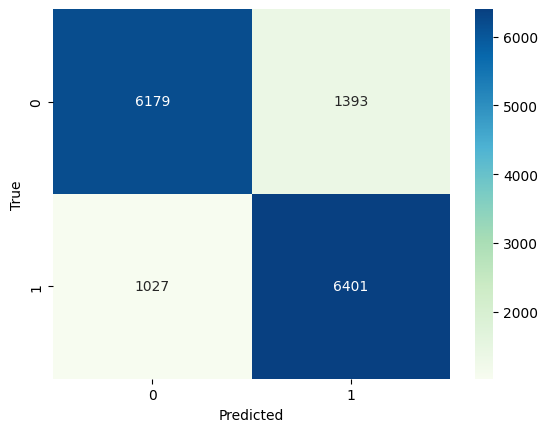

In [ ]:
tabla=confusion_matrix(y_test, y_pred)

#Grafico la matriz de confusión
sns.heatmap(tabla,cmap='GnBu',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')

In [ ]:
accuracy=accuracy_score(y_test,y_pred)
recall=recall_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
precision=precision_score(y_test,y_pred)

print("Accuracy: "+str(accuracy))
print("Recall: "+str(recall))
print("Precision: "+str(precision))
print("f1 score: "+str(f1))

Accuracy: 0.8386666666666667
Recall: 0.8617393645665051
Precision: 0.821272773928663
f1 score: 0.8410195769281303


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.82      0.84      7572
           1       0.82      0.86      0.84      7428

    accuracy                           0.84     15000
   macro avg       0.84      0.84      0.84     15000
weighted avg       0.84      0.84      0.84     15000



## Predicción en test

In [ ]:
df_test = pd.read_csv("test.csv")
df_test_filtrado = df_test.copy()

In [ ]:
test_vectorizado = tf_idf.transform(df_test_filtrado.review_es)
test_pred = model.predict(test_vectorizado)

In [ ]:
test_pred

array([0, 0, 0, ..., 1, 0, 0])

In [ ]:
df_test_ids = df_test['ID']

In [ ]:
data = {'ID': df_test_ids, 'sentimiento': test_pred}
df_final = pd.DataFrame(data)

In [ ]:
df_final['sentimiento'] = df_final['sentimiento'].map({1: 'positivo', 0: 'negativo'})

In [ ]:
df_final.to_csv('submission.csv', index=False)

In [ ]:
df_final

,ID,sentimiento
0,60000,negativo
1,60001,negativo
2,60002,negativo
3,60003,negativo
4,60004,negativo
...,...,...
8594,68594,positivo
8595,68595,negativo
8596,68596,positivo
8597,68597,negativo
